In [1]:
!pip install polars
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
female_formal_1 = pl.read_parquet('data/female_formal_1.parquet')
female_formal_2 = pl.read_parquet('data/female_formal_2.parquet')

female_informal_1 = pl.read_parquet('data/female_informal_1.parquet')
female_informal_2 = pl.read_parquet('data/female_informal_2.parquet')

male_formal_1 = pl.read_parquet('data/male_formal_1.parquet')
male_formal_2 = pl.read_parquet('data/male_formal_2.parquet')

male_informal_1 = pl.read_parquet('data/male_informal_1.parquet')
male_informal_2 = pl.read_parquet('data/male_informal_2.parquet')

In [7]:

def extract_sentimental(df, threshold=0.9):
    features = df.select([
        'time',
        'span_start',
        'span_end',
        'span_text',
        'span_confidence',
        'span_sent_pos',
        'span_sent_neg',
        'span_sent_neu'
    ]).filter(
        (pl.col("span_confidence") > threshold) &
        (pl.col("time") <= 50)
    )

    # Convert the final Polars DataFrame to pandas DataFrame before returning
    features_pd = features.to_pandas()
    return features_pd

# Female formal
female_formal_1_sent = extract_sentimental(female_formal_1)
female_formal_2_sent = extract_sentimental(female_formal_2)

# Female informal 
female_informal_1_sent = extract_sentimental(female_informal_1)
female_informal_2_sent = extract_sentimental(female_informal_2)

# Male formal 
male_formal_1_sent = extract_sentimental(male_formal_1)
male_formal_2_sent = extract_sentimental(male_formal_2)

# Male informal
male_informal_1_sent = extract_sentimental(male_informal_1)
male_informal_2_sent = extract_sentimental(male_informal_2)

# Concatenate female formal and informal
female_formal_au = pd.concat([female_formal_1_sent, female_formal_2_sent], keys=['Female Formal 1', 'Female Formal 2'])
female_informal_au = pd.concat([female_informal_1_sent, female_informal_2_sent], keys=['Female Informal 1', 'Female Informal 2'])
female = pd.concat([female_formal_au, female_informal_au])

# Concatenate male formal and informal
male_formal_sent = pd.concat([male_formal_1_sent, male_formal_2_sent], keys=['Male Formal 1', 'Male Formal 2'])
male_informal_sent = pd.concat([male_informal_1_sent, male_informal_2_sent], keys=['Male Informal 1', 'Male Informal 2'])
male = pd.concat([male_formal_sent, male_informal_sent])

# Concatenate formal and informal
formal = pd.concat([male_formal_sent, female_formal_au])
informal = pd.concat([male_informal_sent, female_informal_au])

# Print out the length of male, female, formal, and informal
print(f"Male: {male.shape[0]}")
print(f"Female: {female.shape[0]}")
print(f"Formal: {formal.shape[0]}")
print(f"Informal: {informal.shape[0]}")



Male: 468
Female: 517
Formal: 498
Informal: 487


In [9]:
# Get mean distribution for formal and informal

def mean_sentiment(df):
    mean = df.groupby('time')[['span_sent_pos', 'span_sent_neg', 'span_sent_neu']].mean().reset_index()
    return mean

formal_mean = mean_sentiment(formal)
informal_mean = mean_sentiment(informal)

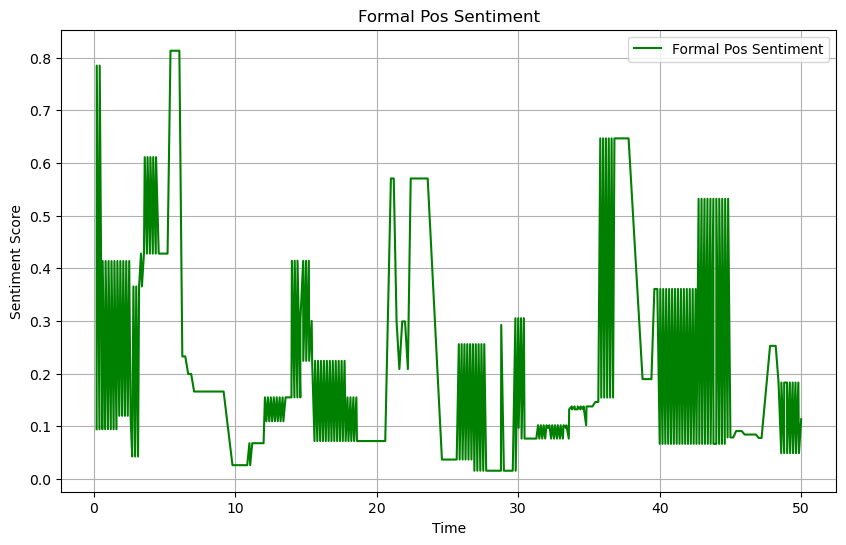

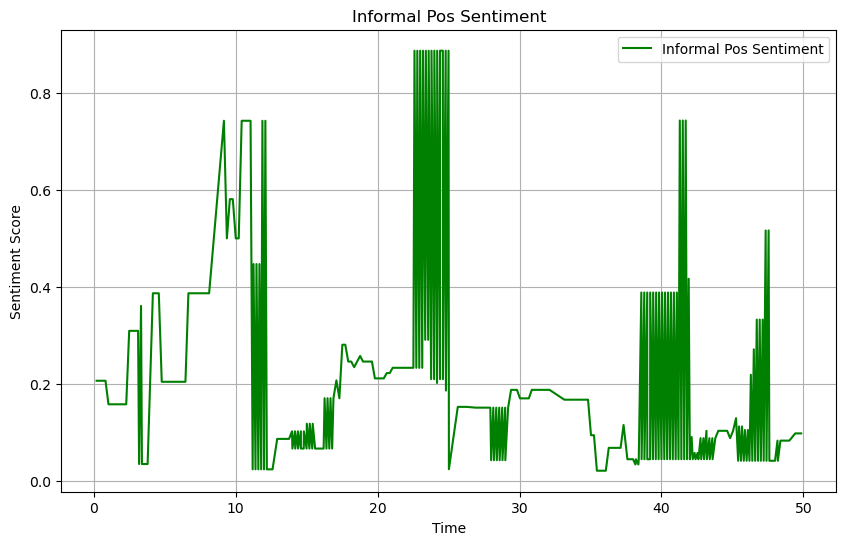

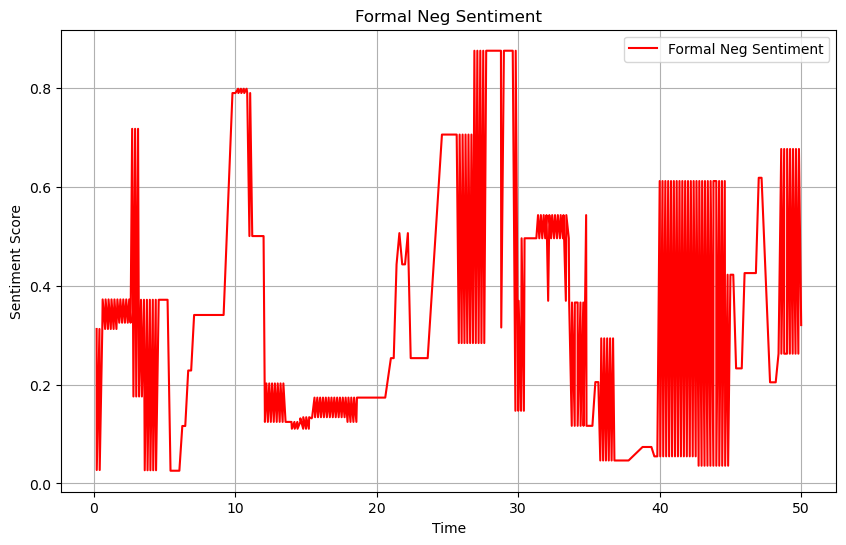

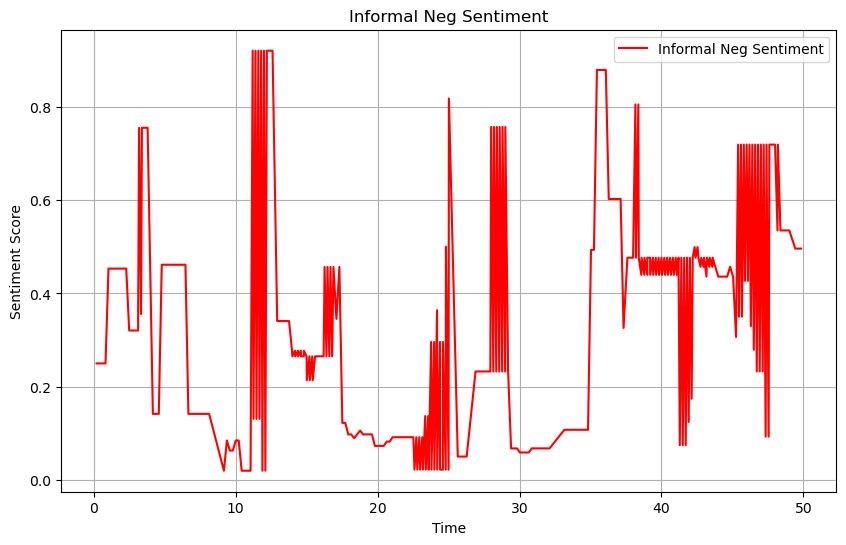

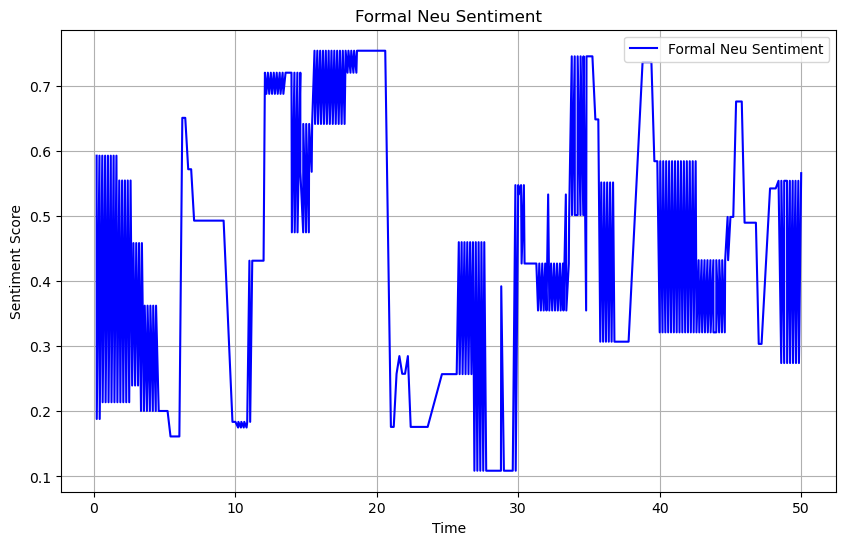

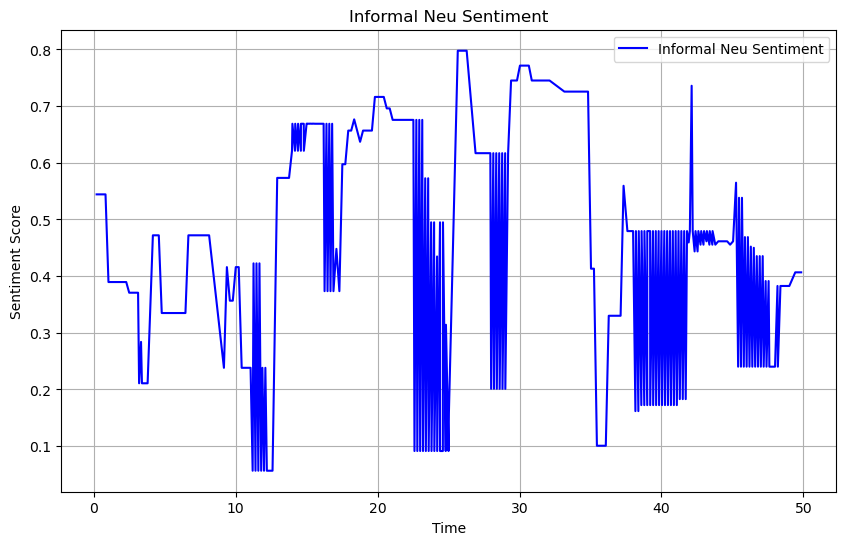

In [17]:
def plot_sentiment(df, sentiment_type, title):
    plt.figure(figsize=(10, 6))
    color_map = {'pos': 'green', 'neg': 'red', 'neu': 'blue'}
    plt.plot(df['time'], df[f'span_sent_{sentiment_type}'], label=title, color=color_map[sentiment_type])
    plt.xlabel('Time')
    plt.ylabel('Sentiment Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot mean sentiment distributions for formal and informal speakers
for sentiment_type in ['pos', 'neg', 'neu']:
    plot_sentiment(formal_mean, sentiment_type, f'Formal {sentiment_type.capitalize()} Sentiment')
    plot_sentiment(informal_mean, sentiment_type, f'Informal {sentiment_type.capitalize()} Sentiment')
